In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import os

from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%pwd #find where we are

'/Users/lisaschreiber/Desktop'

In [3]:
df = pd.read_csv("feature_list.csv")

In [4]:
df.head()

,Unnamed: 0,code_module,module_presentation_length,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,half_sum_clicks,std_half_score
0,2,3.0,261,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,565.0,58.166667
1,32,3.0,261,0,0,-74.0,0,0,0,6,1,6.0,60,8.0,347.0,35.250000
2,40,3.0,261,0,0,-134.0,1,1,0,1,1,3.0,60,64.0,728.0,74.958333
3,41,3.0,261,0,0,-190.0,0,1,1,10,3,1.0,70,24.0,305.0,52.166667
4,54,3.0,261,0,1,-96.0,0,0,0,7,2,8.0,60,61.0,265.0,75.416667


In [5]:
X = df[['code_module', 'module_presentation_length', 'num_of_prev_attempts', 'date_registration','disability',
 'gender','age_band','region','highest_education', 'imd_band', 'studied_credits','b4_sum_clicks','half_sum_clicks','std_half_score']]
y = df['final_result']

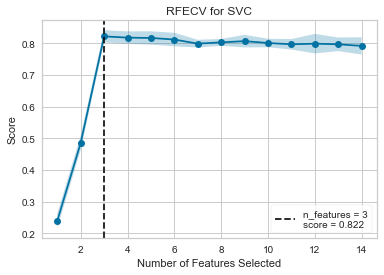

In [6]:
# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=14, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

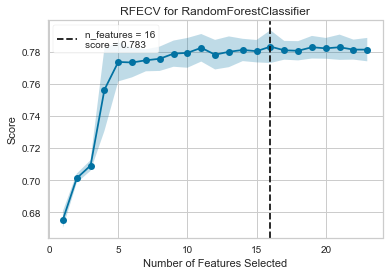

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification dataset
X, y = load_credit()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure